**First import the following libraries and check that Pytorch is running on the computer.**

In [1]:
from __future__ import print_function
from __future__ import division

import os
import time

import numpy as np
import pandas
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Table of Contents
1. [Get familiar with Tensor](#get-familiar-with-tensor)
2. [Neural Network in Pytorch](#neural-network-in-pytorch)
3. [Simple Example for handling images](#simple-example-for-handling-images)
4. [Train a Neural Network in Pytorch](#train-a-neural-network-in-pytorch)
5. [Train more classical ML algorithms](#train-more-classical-ML-algorithms)

## Get familiar with Tensor

Tensors(张量，0 rank tensor: scalar; 1 rank tensor: vector; 2 rank tensor: matric……）  
Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. 

**1.1 Tensor Initialization**    
Tensors can be initialized in various ways. 

In [12]:
# Directly from data
data = [[1, 2], [3, 4]]    # data = [1, 2, 3]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [15]:
# From a NumPy array(and vice versa)
np_array = np.array([[1, 2], [3, 4]])
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [16]:
np = x_np.numpy()
np

array([[1, 2],
       [3, 4]])

In [18]:
# From another tensor:
# The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden

x_ones = torch.ones_like(x_data) # retains the properties of x_data, shape
print(f"Ones Tensor: \n {x_ones} \n")
x_ones_2 = torch.ones(2,2) # use directly: shape
print(f"Ones Tensor: \n {x_ones_2} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Ones Tensor: 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[0.9703, 0.7820],
        [0.7449, 0.6948]]) 



**Tensor Attributes**  
Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [19]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**Tensor Operations**  
Over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more

In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print(f"Device tensor is stored on: {tensor.device}")

In [20]:
# Standard numpy-like indexing and slicing:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [21]:
# Joining tensors You can use torch.cat to concatenate a sequence of tensors along a given dimension. 
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [22]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [23]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


## Neural Network in Pytorch

1. an example of a simple neural network architecture in Python： init & forward

In [2]:
# a Feedforward Neural Network, FNN
# the dimension of input is 784（like MNIST hand-written data）
# the output is 10 dimension for this classification problem
class Network(nn.Module):
    def __init__(self):
        super().__init__()    # 调用父类 nn.Module 的构造函数
        # 相当于直接调用 nn.Module 的 __init__ 方法
        # nn.Module.__init__(self)
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [24]:
# an example for the dim variable of softmax function 
u = torch.randn(2,3)
print("This is a tensor", '\n', u,'\n' )

outputdim1 = F.softmax(u,dim = 1)    # Softmax(dim=1): Normalize by row（used for classification）
print("This is the output of the softmax operation with dim=1", '\n', outputdim1,'\n' )

outputdim0 = F.softmax(u,dim = 0)    # Softmax(dim=1): Normalize by column（not used frequently）
print("This is the output of the operation with dim=0", '\n', outputdim0,'\n' )

This is a tensor 
 tensor([[ 0.7639, -1.8167,  1.7746],
        [-0.3150, -0.0425, -1.1879]]) 

This is the output of the softmax operation with dim=1 
 tensor([[0.2615, 0.0198, 0.7186],
        [0.3662, 0.4809, 0.1530]]) 

This is the output of the operation with dim=0 
 tensor([[0.7463, 0.1450, 0.9509],
        [0.2537, 0.8550, 0.0491]]) 



Input (784)→Hidden (256, Sigmoid)→Output (10, Softmax)  
trainaible parameters：  
hidden layer: (784×256)+256=200,960
output layer: (256×10)+10=2,570  
so the total number of trainaible parameters is 203,530

2. Create a NN

In [3]:
# Create the network 
model1 = Network()

# print the info of NN
print(model1)

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


3) What is the total size (in MB) of this Neural Network ?   
Check also that the number of trainable parameters match the one computed.

In [5]:
from torchsummary import summary

# call the "summary" operation with the good arguments
# summary to calculate the layers, paras and output size
summary(model1, input_size=(1, 784))

# calculate the total number of paras
total_params = sum(p.numel() for p in model1.parameters())

# calculate the the total size (in MB) of this Neural Network (para is always 4 bytes（float32）)
total_size = total_params * 4 / (1024 ** 2)

print(f'The total estimated size of this neural network is {total_size:.2f} [MB]')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]         200,960
           Sigmoid-2               [-1, 1, 256]               0
            Linear-3                [-1, 1, 10]           2,570
           Softmax-4                [-1, 1, 10]               0
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.78
Estimated Total Size (MB): 0.78
----------------------------------------------------------------
The total estimated size of this neural network is 0.78 [MB]


4 How can we access the network weigths? the biases? What are their types?

In [ ]:
# Confrim that the weights and bias are all tensors
print("The weights of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.weight))
print("The biases of the networks are Torch tensors: ", torch.is_tensor(model1.hidden.bias))

weights_hidden_layer = model1.hidden.weight
bias_hidden_layer = model1.hidden.bias
shape_weights_hidden = weights_hidden_layer.shape
shape_bias_hidden = bias_hidden_layer.shape

weights_output_layer = model1.output.weight
bias_output_layer = model1.output.bias
shape_weights_output = weights_output_layer.shape
shape_bias_output = bias_output_layer.shape

# examine the shape of para tnsors
print("The shape of the weights (hidden layer) is: ", shape_weights_hidden)
print("The shape of the biais (hidden layer) is: ", shape_bias_hidden)

5. Another way of creating neural network in Pytorch is by using the module nn.Sequential:  
   create the same neural network as above.

In [7]:
# Hyperparameters for our network (same as before, using nn.Sequential)
input_size = 784
hidden_sizes = 256
output_size = 10

# Build the same feed-forward network using nn.Sequential : 
model2 = nn.Sequential(
    nn.Linear(input_size, hidden_sizes),  
    nn.Sigmoid(),  
    nn.Linear(hidden_sizes, output_size),  
    nn.Softmax(dim=1)      
        )

print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=256, out_features=10, bias=True)
  (3): Softmax(dim=1)
)


6. Which approach should we use: the Sequential one or the one built on the Network class?  
The choice depends on the complexity of the neural network. If the model follows a simple sequential architecture, `nn.Sequential` is more readable and concise.   
However, for more complex networks requiring custom forward passes, multiple inputs/outputs, or residual connections, using a custom class inheriting from `nn.Module` is preferable due to its flexibility.

7. When and how are the weights initialized? You may look into  
   https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py#L70-L73

 Attributes:  
        weight: the learnable weights of the module of shape  
            :math:`(\text{out\_features}, \text{in\_features})`.   
             The values are initialized from :  
             math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})`, where:math:`k = \frac{1}{\text{in\_features}}`  
        bias:   the learnable bias of the module of shape :math:`(\text{out\_features})`.   
                If :attr:`bias` is ``True``, the values are initialized from  
                :math:`\mathcal{U}(-\sqrt{k}, \sqrt{k})` where  
                :math:`k = \frac{1}{\text{in\_features}}`

## Simple Example for handling images

In [8]:
# get the training data from TorchVision (https://pytorch.org/docs/stable/torchvision/index.html) package
# get PIL image
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)

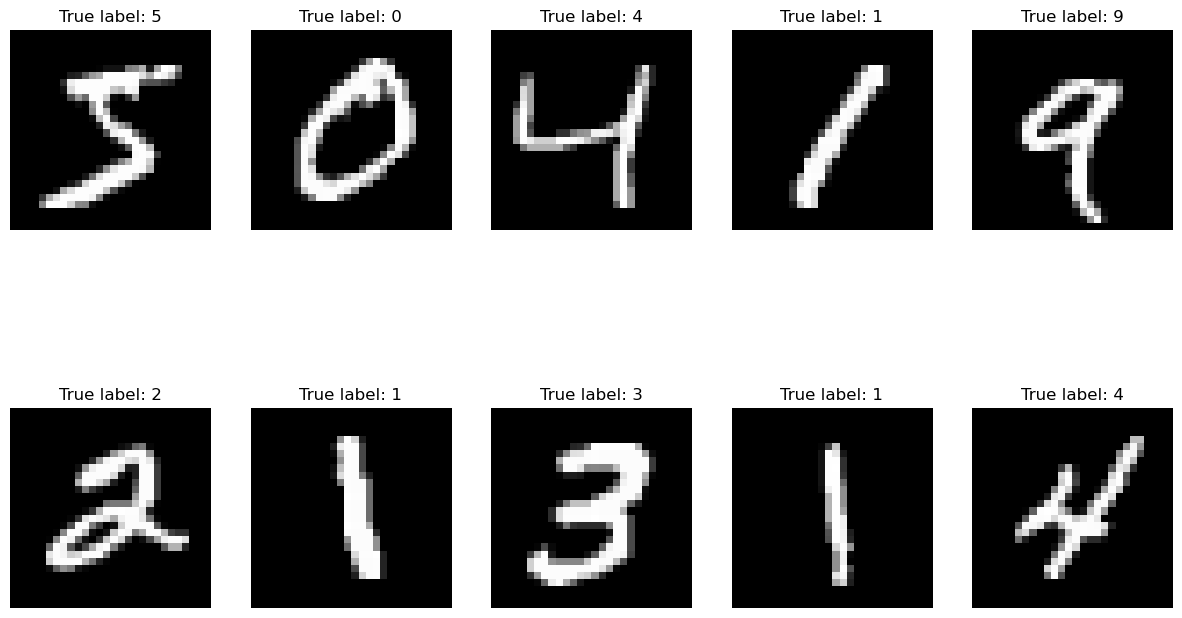

MNIST images are of shapes (28, 28) which leads to 784 dimensions (pixels)


In [10]:
from torchvision import datasets, transforms
#Load the image number i and print its true label

plt.figure(figsize=(15, 9))
for i in range(10):
    plt.subplot(2,5,i+1)
    
    image, image_true_label = trainset[i]  # 获取 PIL 图像和标签
    image = np.array(image)  # 将 PIL 图像转换为 NumPy 数组
    
    plt.imshow(image, cmap="gray")  # 显示灰度图像
    plt.title("True label: {}".format(image_true_label))  # 设置标题
    plt.axis("off")  # 隐藏坐标轴

plt.show()

# What are the shapes and the sizes of the images?
im_shape = image.shape
total_pixels = im_shape[0] * im_shape[1]

print("MNIST images are of shapes {} which leads to {} dimensions (pixels)".format(im_shape,total_pixels))

3.1 - Normalization  
Data set should be normalized to avoid numerical instability. Indeed, working with big floats can lead to important numerical errors. It is a good practice to normalize the inputs (features) so that they have zero mean and a constant (small) variance. To convince yourself of the damages that can result from numerical instability, see the following cell:

In [11]:
foo = 1e9
for i in range(int(1e6)):
    foo += 1e-6
foo -= 1e9
print("Numerically instable sum: %f " % foo)

bar = 1
for i in range(int(1e6)):
    bar += 1e-6
bar -= 1
print("Numerically stable sum: %f " % bar)

Numerically instable sum: 0.953674 
Numerically stable sum: 1.000000 


a) mathematically speaking, the values of 'foo' and 'bar'should both be 1  
b) In computers, floating point numbers are represented with limited precision, and foo is 10^15 times larger than 1e-6. When you add 1e-6 to 1e9, 1e-6 is too small and may not be stored accurately, resulting in loss of precision. This phenomenon is called "catastrophic cancellation".

In [ ]:
float_accuracy = np.finfo(float).eps    # 浮点数的精度（即最小有效数字），即浮点数运算中能表示的最小增量
foo = 1 + float_accuracy/2 - 1
print('1+epsilon-1 = epsilon. Using floating-point arithmetics, however... the result depends on the value of epsilon.')
print('in particular, 1+epsilon-1 outputs ', foo, ' when epsilon=',float_accuracy/2)

So we should do the normaliztion of images

In [19]:
# For normalization, compute mean and std of the data
avg = 0
for i in range(len(trainset)):
    avg = avg + np.mean(trainset[i][0])    # trainset[i][0] is an image, but we can calculate its mean, it's the mean of 28*28 dims
avg = avg/len(trainset)

var = 0
for i in range(len(trainset)):
    var = var + np.mean((trainset[i][0]-avg)**2)
var = var/len(trainset)

[avg, np.sqrt(var)]

[33.318421449829934, 78.56748998339792]

Now, we need to load the dataset and renormalize the data. Additionnally, PyTorch works with tensors, thus, we need to transform the data into tensors. The following code does this operation.

In [32]:
from torchvision import transforms

# Define a transform to normalize the data: 
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize (mean = 0.1307, std = 0.3081) ])    

# Download (it should have been done earlier, normally) and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# download=True 表示如果本地没有数据集，它会从互联网下载
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 10000)
# trainset 是训练集，batch_size=64 表示每次加载 64 张图像作为一个批次进行训练。
#                   shuffle=True 表示在每个训练周期开始时，随机打乱训练集中的样本顺序，以便模型不会记住数据的顺序，帮助提高训练效果。
# testloader = torch.utils.data.DataLoader(testset, batch_size=10000)：
#              testset 是测试集，batch_size=10000 表示每次加载整个测试集。通常，测试集是整个数据集的评估，批量大小较大有助于一次性处理完测试集。

The training batch size is set to 64, meaning that each time the model is trained, it will process 64 images at once before updating the model parameters.
The testing batch size is set to 10000, meaning the model will process 10000 images from the test set in one batch during evaluation.

An epoch refers to one complete pass through the entire training dataset. In this case, the number of iterations per epoch is determined by the number of samples in the training set divided by the batch size.
The training set size is typically 60,000 images for MNIST.The batch size is 64.
So, the number of iterations per epoch can be calculated as:

Iterations per epoch = Number of training samples/Batch size = 60000/64 = 937.5, PyTorch will round this number up, meaning 938 iterations will be needed to complete one epoch.

## Train a Neural Network in Pytorch

In [33]:
# Goal: Define the network architecture as a new nn.Module subclass
# Compared to the sequential way of defining your network,

class ReluNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.fc1 = nn.Linear(28*28, 256) 
        
        # Hidden layer to output layer (hidden size 256, output size 10 for 10 digits)
        # Output layer, 10 units - one for each digit
        self.fc2 = nn.Linear(256, 10)  # Linear transformation from hidden layer to output layer
        
        # Define Relu activation and softmax output 
        self.relu = nn.ReLU()  # ReLU activation
        self.softmax = nn.Softmax(dim=1)  # Softmax for multi-class classification (on the output layer)

        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = x.view(-1, 28*28)  # Flatten the input (batch_size, 1, 28, 28) to (batch_size, 784)
        x = self.fc1(x)  # Apply the first linear transformation (input to hidden)
        x = self.relu(x)  # Apply ReLU activation
        x = self.fc2(x)  # Apply the second linear transformation (hidden to output)
        x = self.softmax(x)  # Apply softmax to get probabilities for each class 
        return x

# Instantiate the model
model = ReluNetwork()

# Define the loss(Cross-Entropy Loss for classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent with learning rate of 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

#### Explanations on autodiff

```torch.Tensor``` is the central class of the package. If you set its attribute ```.requires_grad``` as True, it starts to track all operations on it. When you finish your computation you can call ```.backward()``` and have all the gradients computed automatically. The gradient for this tensor will be accumulated into ```.grad``` attribute.

In [24]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  

y.backward()  
print(x.grad) 

tensor(4.)


4.1 try a NN with 5 epochs, get the training loss, the test loss, and the criterion at the end of each epoch 

In [34]:
# GOAL: train the network with your optimizer over 5 epochs and  returns the training loss,
# the test loss, and the criterion at the end of each epoch 
start_time = time.time()
epochs = 5
# 每个 epoch 训练 60,000 个样本，5 个 epoch 训练的总样本数：300,000
# 但这些样本并不是 300,000 个不同的样本，而是 60,000 个样本被训练了 5 遍！

for e in range(epochs):
    running_loss = 0
    running_test_loss=0
    correct_train = 0
    total_train = 0
    
    # 训练阶段 trainloader 是一个批量（batch）的迭代器，它会：每次从训练集中取出一个 batch（64 个样本）。
    # 在一个 epoch 里，把整个训练集都划分成多个 batch，全部训练一遍。
    # model.train()  # 设置模型为训练模式
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad() # 这行代码的作用是清除前一次计算的梯度，否则梯度会累积
        
        output = model(images)
        loss = criterion(output, labels)
        
        # now: backpropagate and perform one optimization step
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        predictions = torch.argmax(output, dim=1)
        correct_train += (predictions == labels).sum().item()
        total_train += labels.size(0)

    train_accuracy = correct_train / total_train

    
    correct_test = 0
    total_test = 0
    # Compute validation loss
    with torch.no_grad():    # 在测试时禁用梯度计算，提高运行效率
        for images, labels in testloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
                
            # Complete those lines:
            outputs = model(images)
            test_loss = criterion(outputs, labels)
            running_test_loss += test_loss.item()

            predictions = torch.argmax(outputs, dim=1)
            correct_test += (predictions == labels).sum().item()    # .item() 是为了获取 Python 标量值，而不是 PyTorch 张量
            total_test += labels.size(0)
               
            test_accuracy = correct_test / total_test
            
        print("Epoch number", e+1)
        print("Training loss: ", round(running_loss/len(trainloader),3))
        print("Test loss: ", round(running_test_loss/len(testloader),3))
        print("Test Accuracy: ", test_accuracy)

print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number 1
Training loss:  2.013
Test loss:  1.758
Test Accuracy:  0.7816
Epoch number 2
Training loss:  1.713
Test loss:  1.679
Test Accuracy:  0.817
Epoch number 3
Training loss:  1.663
Test loss:  1.61
Test Accuracy:  0.8982
Epoch number 4
Training loss:  1.602
Test loss:  1.582
Test Accuracy:  0.9093
Epoch number 5
Training loss:  1.583
Test loss:  1.571
Test Accuracy:  0.9119
--- 100.274 seconds ---


In [25]:
print(len(trainloader))  # 计算 trainloader 里有多少个 batch

938


4.2 More generally, define a training *function* that has different optimizer and   
returns three lists containing respectively the training loss, the test loss, and the criterion value at the end of each epoch.

In [38]:
# Goal: Define a training **function** that returns the training loss, the test loss, and the criterion at the end of each epoch 
def training(model,
             criterion=nn.NLLLoss(),
             optim_alg="SGD",
             lr=0.01,
             momentum=(.9, .999),
             schedule=False,
             nb_epochs=5,
             intermediate_prints=False,
            ):

    if optim_alg == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum[0])
    elif optim_alg == "ADAM":
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=momentum)
    else:
        raise ValueError("optim_alg must take its value in {}".format(["SGD", "ADAM"]))
        
    if schedule:
        scheduler = ReduceLROnPlateau(optimizer, factor=0.3, patience=1)
    
    epoch_train_losses_list = []
    epoch_test_losses_list = []
    epoch_accuracy_list = []

    for e in range(nb_epochs):
        running_loss = 0
        running_test_loss=0
        for images, labels in trainloader:
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            # Evaluate the output, loss, backpropagate and perform an optimization step:
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()

        correct_test = 0
        total_test = 0
        #Compute validation loss
        with torch.no_grad():
            for images, labels in testloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)

                # Update the validation loss and compute accuracy:
                outputs = model(images)
                test_loss = criterion(outputs, labels)
                running_test_loss += test_loss.item()

                predictions = torch.argmax(outputs, dim = 1)
                correct_test += (predictions == labels).sum().item()
                total_test += labels.size(0)
               
            test_accuracy = correct_test / total_test

        final_train_loss = running_loss/len(trainloader)
        final_test_loss = running_test_loss/len(testloader)
        
        if intermediate_prints:
            print("Epoch number: {}".format(e+1))
            print("Training loss = {} ".format(round(final_train_loss,3)))
            print("Test loss = {} ".format(round(final_test_loss,3)))
            print("Test Accuracy = {} ".format(test_accuracy))
        
        epoch_train_losses_list.append(final_train_loss)
        epoch_test_losses_list.append(final_test_loss)
        epoch_accuracy_list.append(test_accuracy)
        
        if schedule:
            scheduler.step(final_test_loss)
        
    return epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list

In [39]:
# Goal: run a training with the optimization algorithm of your choice

start_time = time.time()
nb_epochs = 10

# Training of the model
epoch_train_losses_list, epoch_test_losses_list, epoch_accuracy_list = training(
    model,
    criterion=nn.NLLLoss(),
    optim_alg="SGD",
    lr=0.01,
    momentum=(0., ),
    schedule=False,
    nb_epochs=nb_epochs,
    intermediate_prints=True,
)

print("--- %s seconds ---" % round((time.time() - start_time), 3))

Epoch number: 1
Training loss = -0.881 
Test loss = -0.892 
Test Accuracy = 0.9171 
Epoch number: 2
Training loss = -0.889 
Test loss = -0.899 
Test Accuracy = 0.9197 
Epoch number: 3
Training loss = -0.895 
Test loss = -0.903 
Test Accuracy = 0.9211 
Epoch number: 4
Training loss = -0.9 
Test loss = -0.906 
Test Accuracy = 0.9236 
Epoch number: 5
Training loss = -0.904 
Test loss = -0.91 
Test Accuracy = 0.9256 
Epoch number: 6
Training loss = -0.907 
Test loss = -0.913 
Test Accuracy = 0.9288 
Epoch number: 7
Training loss = -0.91 
Test loss = -0.915 
Test Accuracy = 0.9296 
Epoch number: 8
Training loss = -0.913 
Test loss = -0.917 
Test Accuracy = 0.9317 
Epoch number: 9
Training loss = -0.915 
Test loss = -0.919 
Test Accuracy = 0.9314 
Epoch number: 10
Training loss = -0.918 
Test loss = -0.921 
Test Accuracy = 0.9349 


NameError: name 'send' is not defined

4.4 Let's visualize the predictions of the model for some random test images:   
for a minibatch of size 10 of test images, the following code prints the image, its label, the corresponding prediction given by the network, and the network accuracy on the minibatch. 

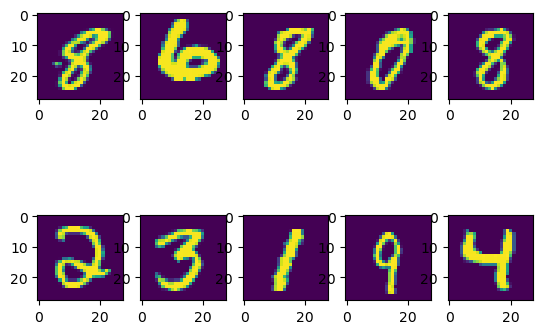

Predictions are tensor([8, 6, 8, 0, 8, 2, 3, 1, 9, 4])
True labels are tensor([8, 6, 8, 0, 8, 2, 3, 1, 9, 4])
test accuracy on this minibatch of size 10 is 100 % 


In [35]:
test_batch_size = 10
minitestloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)
running_loss = 0
running_test_loss = 0
u = 0

for images, labels in minitestloader:
    if u < 1:    # 只运行一次

        for i in range(test_batch_size):
            plt.subplot(2, int(test_batch_size / 2), i + 1)
            plt.imshow(images[i][0])
        plt.show()

        images = images.view(images.shape[0], -1)
        outputs = model(images)
        test_loss = criterion(outputs, labels)
        running_test_loss += test_loss.item()

        predictions = torch.argmax(outputs, 1)
        print('Predictions are', predictions)
        print('True labels are', labels)
        correct_test = predictions.eq(labels).sum().item()

        print('test accuracy on this minibatch of size %d is %.0f %% ' %
              (test_batch_size, 100 * correct_test / test_batch_size))

        test_accuracy = 100 * correct_test / len(predictions)
        u = u + 1

4.5 Analyzing the performance of the optimizer for the training

As expected, we see a training error which decreases with the number of epochs. However, there is no overfitting since the test loss is also decreasing. We could add a few more epochs to the training procedure to see if the network performance can be improved.

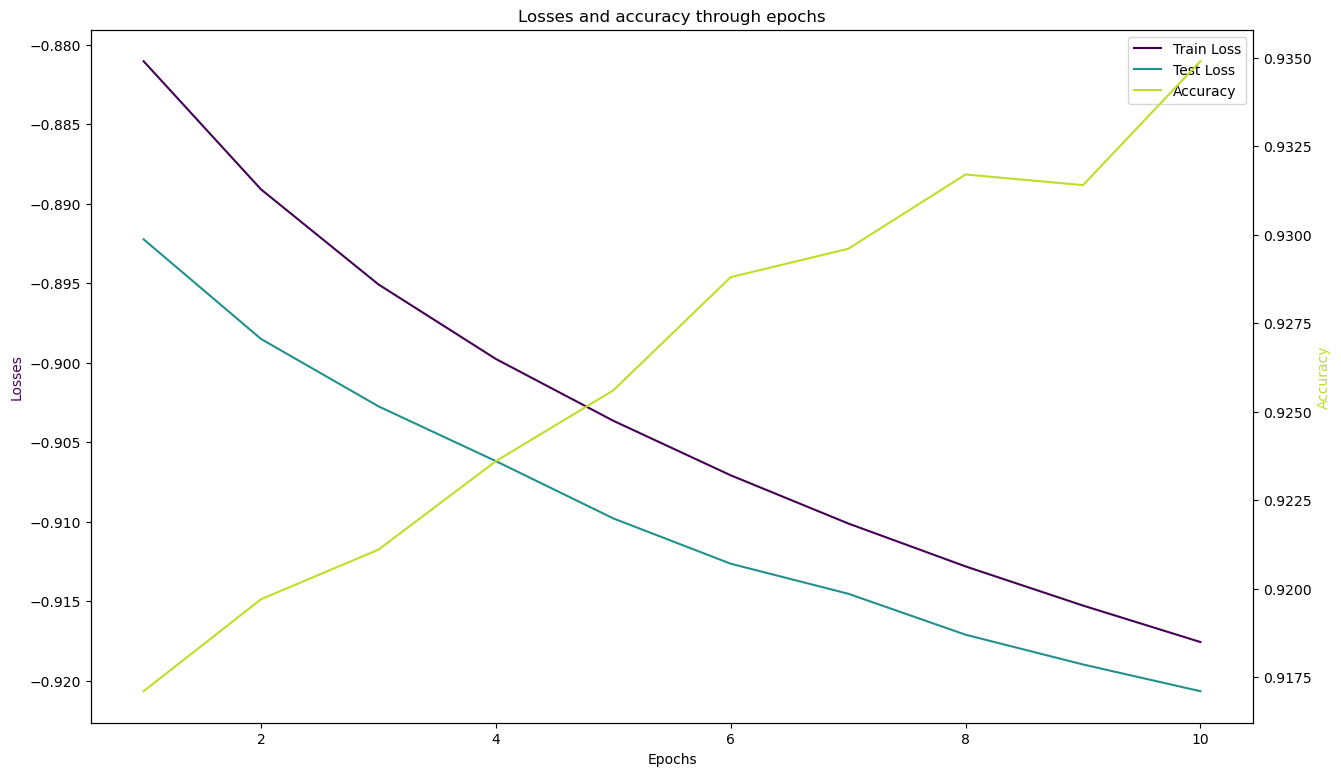

In [40]:
# Plot losses and accuracy curves of the first training through time

fig = plt.figure(figsize=(15, 9))
host = fig.add_subplot(111)
secondary = host.twinx()

host.set_xlabel("Epochs")
host.set_ylabel("Losses")
secondary.set_ylabel("Accuracy")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(np.arange(nb_epochs)+1, epoch_train_losses_list, color=color1, label="Train Loss")
p2, = host.plot(np.arange(nb_epochs)+1, epoch_test_losses_list, color=color2, label="Test Loss")
p3, = secondary.plot(np.arange(nb_epochs)+1, epoch_accuracy_list, color=color3, label="Accuracy")

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

host.yaxis.label.set_color(p1.get_color())
secondary.yaxis.label.set_color(p3.get_color())

plt.title("Losses and accuracy through epochs")

plt.show()

4.6 Compare different optimizers

NameError: name 'send' is not defined

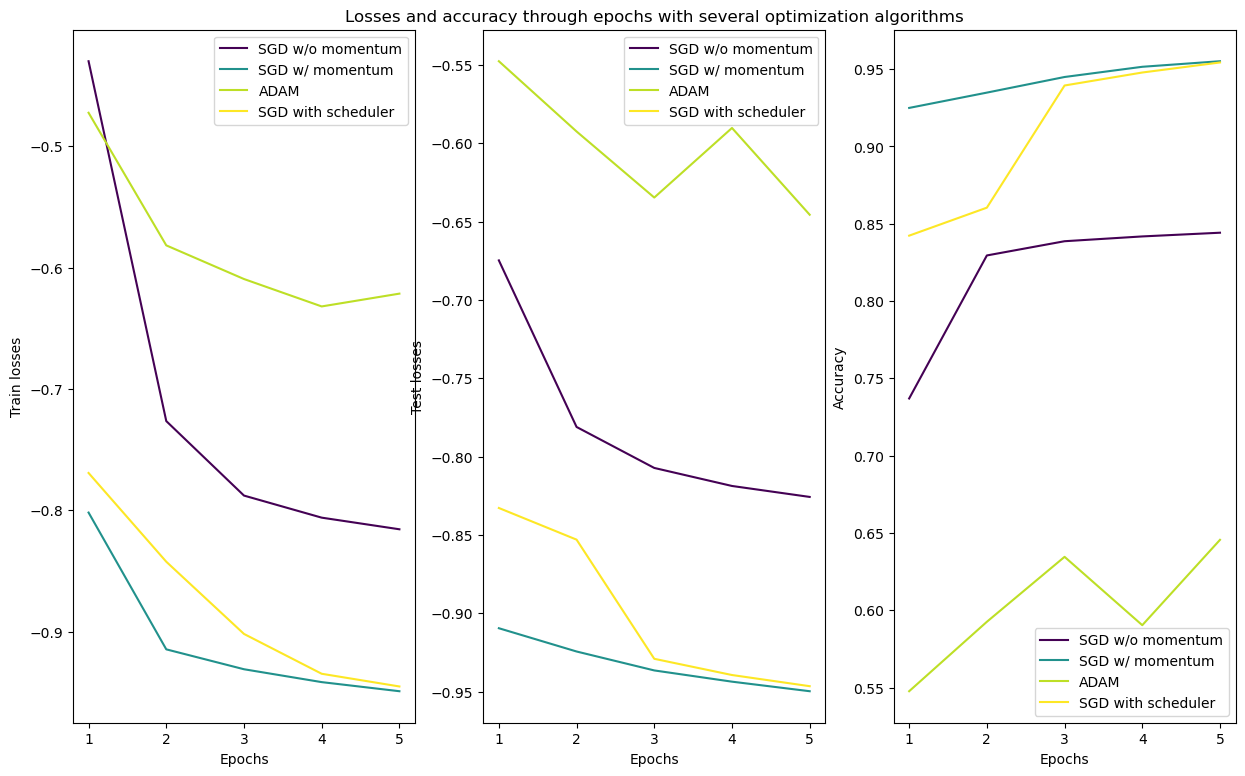

In [41]:
# Compare several optimization algorithms performance

start_time = time.time()

# Training the same architecture with different losses
nb_epochs = 5

# SGD w/o momentum
epoch_train_losses_list1, epoch_test_losses_list1, epoch_accuracy_list1 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD w/ momentum
epoch_train_losses_list2, epoch_test_losses_list2, epoch_accuracy_list2 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9,),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# ADAM
epoch_train_losses_list3, epoch_test_losses_list3, epoch_accuracy_list3 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="ADAM",
                                                                                   lr=0.01,
                                                                                   momentum=(0.9, 0.999),
                                                                                   schedule=False,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# SGD with scheduler
epoch_train_losses_list4, epoch_test_losses_list4, epoch_accuracy_list4 = training(ReluNetwork(),
                                                                                   criterion=nn.NLLLoss(),
                                                                                   optim_alg="SGD",
                                                                                   lr=0.1,
                                                                                   momentum=(0.,),
                                                                                   schedule=True,
                                                                                   nb_epochs=nb_epochs,
                                                                                   intermediate_prints=False,
                                                                                  )

# Plot curves
fig = plt.figure(figsize=(15, 9))

plt.subplot(1,3,1)
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_train_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Train losses")

plt.subplot(1,3,2)
plt.title("Losses and accuracy through epochs with several optimization algorithms")
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_test_losses_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Test losses")

plt.subplot(1,3,3)
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list1, color=plt.cm.viridis(0))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list2, color=plt.cm.viridis(0.5))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list3, color=plt.cm.viridis(.9))
plt.plot(np.arange(nb_epochs)+1, epoch_accuracy_list4, color=plt.cm.viridis(1.3))
plt.legend(["SGD w/o momentum", "SGD w/ momentum", "ADAM", "SGD with scheduler"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

send(plt, 14)

plt.show()

print("--- %s seconds ---" % round((time.time() - start_time), 3))

In [ ]:
#Note that we reinstanciate the model before each training since the parameters of the network are initialized at this time. 
#If not, the parameters would be kept in memore between the consecutive trainings. 

# model = NeuralNet()  # 第一次实例化模型
# train(model)  # 训练一次

# model = NeuralNet()  # 重新实例化模型，参数被重新初始化
# train(model)  # 这次训练是从零开始，不受上一次训练影响

## Train more classical ML algorithms

5.1 Implement a random forest and compute its accuracy on the MNIST test set. Compare with Neural Networks.

In [43]:
# Reload the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True)
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False)

input_size = np.array(trainset[0][0]).shape[0] * np.array(trainset[0][0]).shape[1]
train_size = len(trainset)
test_size = len(testset)

X_train = np.zeros((train_size,input_size))
y_train = np.zeros(train_size)

X_test = np.zeros((test_size,input_size))
y_test = np.zeros(test_size)

for i in range(train_size):
    X_train[i] = np.ravel(trainset[i][0])
    y_train[i] = trainset[i][1]
    
for i in range(test_size):
    X_test[i] = np.ravel(testset[i][0])
    y_test[i] = testset[i][1]

#Implement classical machine learning methods. Warning: LogisticRegression and LinearSVC take a long time to run

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=100)  
rf.fit(X_train, y_train)  
accuracy_rf = rf.score(X_test, y_test)  

#from sklearn.ensemble import GradientBoostingClassifier
#gbc = GradientBoostingClassifier(subsample=0.01, n_estimators=10)
#gbc.fit(X_train, y_train)
#accuracy_gb = gbc.score(X_test, y_test)

#Too long to run
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()
#lr.fit(X_train, y_train)
#accuracy_lr = lr.score(X_test, y_test)

# #Too long to run
#from sklearn.svm import LinearSVC
#svcl = LinearSVC()
#svcl.fit(X_train, y_train)
#accuracy_svc = svcl.score(X_test, y_test)

print("Random forest accuracy is %.3f" % accuracy_rf)
#print("Gradient boosting accuracy is %.3f" % accuracy_gb) 
#print("Logistic regression accuracy is", round(accuracy_lr, 3))
#print("SVC accuracy is", round(accuracy_svc, 3))

Random forest accuracy is 0.970
